![](../../CintillaTecNM-ITD.png)

<div style="Text-align: center">
    <h2> Análisis de datos masivos </h2>
    <h3> Verificación de velocidades de Internet </h3><br>
    <h3> Nombre docente </h3>
    <h4> Jose Gabriel Rodriguez Rivas <h4>
    <h3> Nombre Alumno </h3>
    <h4> Misael Omar Vargas Ochoa <h4>
</div>

## Parte 1: Determinar si la velocidad de Internet proporcionada cumple con la establecida en el contrato del proveedor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df_compact = pd.read_csv('rpi_data_processed.csv')

df_compact.head()

,Upload (Mbit/s),Date,Time,Ping (ms),Download (Mbit/s)
0,14.31,2016-11-24,13:36:25,26.992,91.80
1,14.12,2016-11-24,13:36:55,24.532,88.19
2,14.11,2016-11-24,13:37:25,20.225,59.86
3,14.22,2016-11-24,13:37:57,19.332,91.81
4,14.08,2016-11-24,13:38:27,22.494,92.05


In [3]:
df_compact = df_compact.dropna()

In [4]:
df_compact['Ping (ms)'] = df_compact['Ping (ms)'].apply(lambda val: float(val))
df_compact['Download (Mbit/s)'] = df_compact['Download (Mbit/s)'].apply(lambda val: float(val))

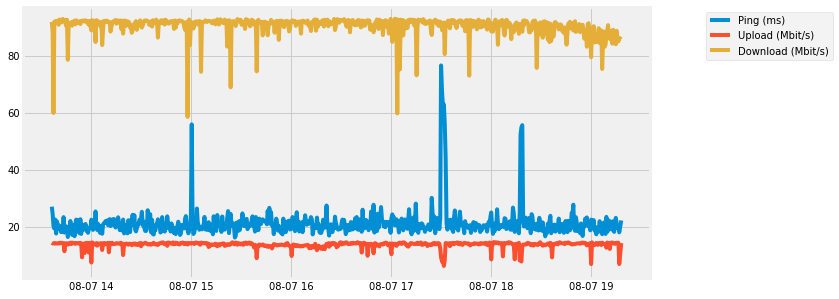

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))

t = pd.to_datetime(df_compact['Time'])

ax.plot(t, df_compact['Ping (ms)'], label='Ping (ms)')
ax.plot(t, df_compact['Upload (Mbit/s)'], label='Upload (Mbit/s)')
ax.plot(t, df_compact['Download (Mbit/s)'], label='Download (Mbit/s)')

# Insert a legend outside of the main plot
ax.legend(bbox_to_anchor=(1.3, 1.))
plt.show()

In [6]:
acceptable_upload = 13 #Mbit/s
acceptable_download = 88 #Mbit/s
acceptable_ping = 20 #ms

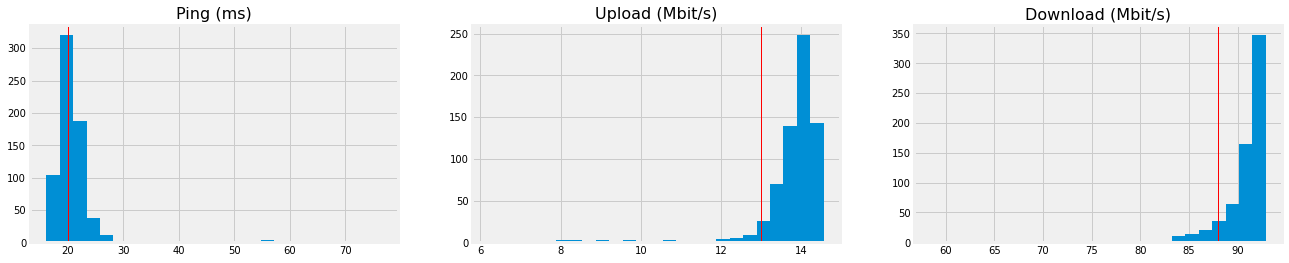

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))

# plot ping speed
ax1.hist(df_compact['Ping (ms)'], 25)
# plot acceptable ping
ax1.axvline(acceptable_ping, color='red', linewidth=1)
ax1.set_title('Ping (ms)', fontsize=16)

# plot upload speed
ax2.hist(df_compact['Upload (Mbit/s)'], 25)
# plot acceptable upload
ax2.axvline(acceptable_upload, color='red', linewidth=1)
ax2.set_title('Upload (Mbit/s)', fontsize=16)

# plot download speed
ax3.hist(df_compact['Download (Mbit/s)'], 25)
# plot acceptable download
ax3.axvline(acceptable_download, color='red', linewidth=1)
ax3.set_title('Download (Mbit/s)', fontsize=16)

plt.show()

In [8]:
means = df_compact.mean()
stands = df_compact.std()

# this makes the results look better with labels
quote_ping = (means['Ping (ms)'], stands['Ping (ms)'])
quote_download = (means['Download (Mbit/s)'], stands['Download (Mbit/s)'])
quote_upload = (means['Upload (Mbit/s)'], stands['Upload (Mbit/s)'])

# print the results
print('Average Ping time: {} ± {} ms'.format(*quote_ping))
print('Average Download time: {} ± {} ms'.format(*quote_download))
print('Average Upload time: {} ± {} ms'.format(*quote_upload))

print('')
print('Distance of acceptable Ping speed from average: {:.2f} standard deviations'.format((quote_ping[0]-acceptable_ping)/quote_ping[1]))
print('Distance of acceptable Download speed from average: {:.2f} standard deviations'.format((quote_download[0]-acceptable_download)/quote_download[1]))
print('Distance of acceptable Upload speed from average: {:.2f} standard deviations'.format((quote_upload[0]-acceptable_upload)/quote_upload[1]))

Average Ping time: 21.115451708766717 ± 5.161225495663228 ms
Average Download time: 90.44921248142644 ± 3.465647031815227 ms
Average Upload time: 13.697607726597328 ± 1.0804708853031766 ms

Distance of acceptable Ping speed from average: 0.22 standard deviations
Distance of acceptable Download speed from average: 0.71 standard deviations
Distance of acceptable Upload speed from average: 0.65 standard deviations


In [9]:
print('{:.2f}% of measurements are lower than the acceptable download speed.'.format(np.sum(df_compact['Download (Mbit/s)']<acceptable_download)/float(len(df_compact))*100))
print('{:.2f}% of measurements are lower than the acceptable upload speed.'.format(np.sum(df_compact['Upload (Mbit/s)']<acceptable_upload)/float(len(df_compact))*100))
print('{:.2f}% of measurements are lower than the acceptable upload speed.'.format(np.sum(df_compact['Ping (ms)']<acceptable_ping)/float(len(df_compact))*100))

11.00% of measurements are lower than the acceptable download speed.
7.88% of measurements are lower than the acceptable upload speed.
42.79% of measurements are lower than the acceptable upload speed.


In [10]:
all_three = np.sum((df_compact['Ping (ms)']<acceptable_ping) & (df_compact['Download (Mbit/s)']<acceptable_download) & (df_compact['Upload (Mbit/s)']<acceptable_upload))
print('{:.2f}% of measurements are not acceptable in three cases.'.format(all_three/float(len(df_compact))*100))

0.59% of measurements are not acceptable in three cases.


In [11]:
ping_upload = np.sum((df_compact['Ping (ms)']<acceptable_ping) & (df_compact['Upload (Mbit/s)']<acceptable_upload))
print('{:.2f}% of measurements are not acceptable for ping and upload.'.format(ping_upload/float(len(df_compact))*100))

ping_download = np.sum((df_compact['Ping (ms)']<acceptable_ping) & (df_compact['Download (Mbit/s)']<acceptable_download))
print('{:.2f}% of measurements are not acceptable for ping and download.'.format(ping_download/float(len(df_compact))*100))

download_upload = np.sum((df_compact['Download (Mbit/s)']<acceptable_download) & (df_compact['Upload (Mbit/s)']<acceptable_upload))
print('{:.2f}% of measurements are not acceptable for download and upload.'.format(download_upload/float(len(df_compact))*100))


2.97% of measurements are not acceptable for ping and upload.
4.61% of measurements are not acceptable for ping and download.
1.34% of measurements are not acceptable for download and upload.
